<a href="https://www.kaggle.com/code/mustafakapici/loan-classification-100-accuracy?scriptVersionId=182515381" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
path = '/kaggle/input/simple-loan-classification-dataset/loan.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
df.shape

(61, 8)

In [5]:
#drop unnecessary columns
#df.drop(columns=['unnecessary'], inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,61.0,37.081967,8.424755,24.0,30.0,36.0,43.0,55.0
income,61.0,78983.606557,33772.025802,25000.0,52000.0,78000.0,98000.0,180000.0
credit_score,61.0,709.836066,72.674888,560.0,650.0,720.0,770.0,830.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [8]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [9]:
df.dropna()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [10]:
target_feature = 'loan_status'

#categorical_features = ['category1','category2','category3','category4','category5']

categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != target_feature]

numerical_features = [col for col in df.columns if df[col].dtype != 'object' and col != target_feature and col not in categorical_features]

print(f'Categorical features: {categorical_features}')
print(f'Numerical Features: {numerical_features}')

Categorical features: ['gender', 'occupation', 'education_level', 'marital_status']
Numerical Features: ['age', 'income', 'credit_score']


In [11]:
from sklearn.preprocessing import  LabelEncoder

In [12]:
# target feature'ı encode etme
le = LabelEncoder()
df[target_feature] = le.fit_transform(df[target_feature])


In [13]:
def plot_histplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 4) + 1
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 4, i + 1)
        sns.histplot(data=data, x=feature, hue=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_countplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 4) + 1
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 4, i + 1)
        sns.countplot(data=data, x=feature, hue=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_boxplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 4) + 1
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 4, i + 1)
        sns.boxplot(data=data, x=feature, y=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_barplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 4) + 1
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 4, i + 1)
        sns.barplot(data=data, x=feature, y=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_scatterplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 2) + 1
    fig, ax = plt.subplots(rows, 2, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 2, i + 1)
        sns.scatterplot(data=data, x=feature, y=target_feature, hue=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_lineplot(data, features, target_feature):
    data = data[features + [target_feature]]
    n = len(features)
    rows = (n // 4) + 1
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i, feature in enumerate(features):
        plt.subplot(rows, 4, i + 1)
        sns.lineplot(data=data, x=feature, y=target_feature, hue=target_feature, palette='inferno')
        plt.xlabel(feature, fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_pairplot(data, features, target_feature):
    data = data[features + [target_feature]]
    sns.pairplot(data, hue=target_feature, palette='inferno')
    plt.show()

def plot_heatmap(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='viridis')
    plt.xticks(rotation=85)
    plt.show()

<Axes: xlabel='loan_status'>

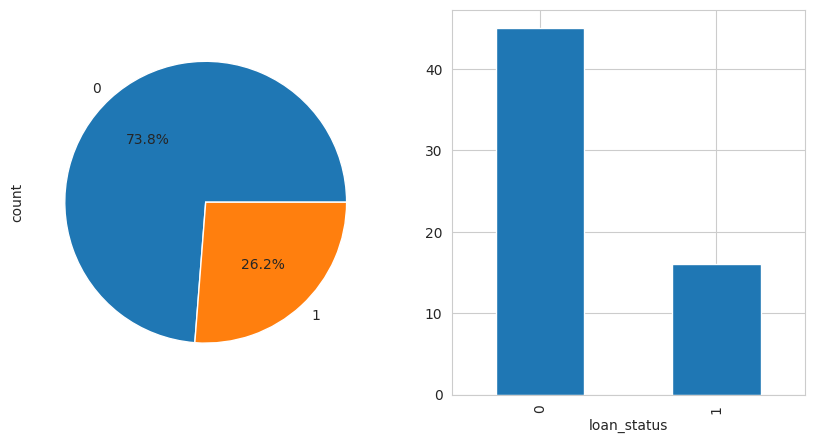

In [14]:
#target distribition pie plot & count plot yanyana çizdirme
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df[target_feature].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1, 2, 2)
df[target_feature].value_counts().plot(kind='bar')

In [15]:
#sns.barplot(df[categorical_features])

In [16]:
numerical_df= df.drop(categorical_features, axis=1)
corr = numerical_df.corr()[target_feature].sort_values(ascending=False)
corr

loan_status     1.000000
age            -0.648135
income         -0.699577
credit_score   -0.820765
Name: loan_status, dtype: float64

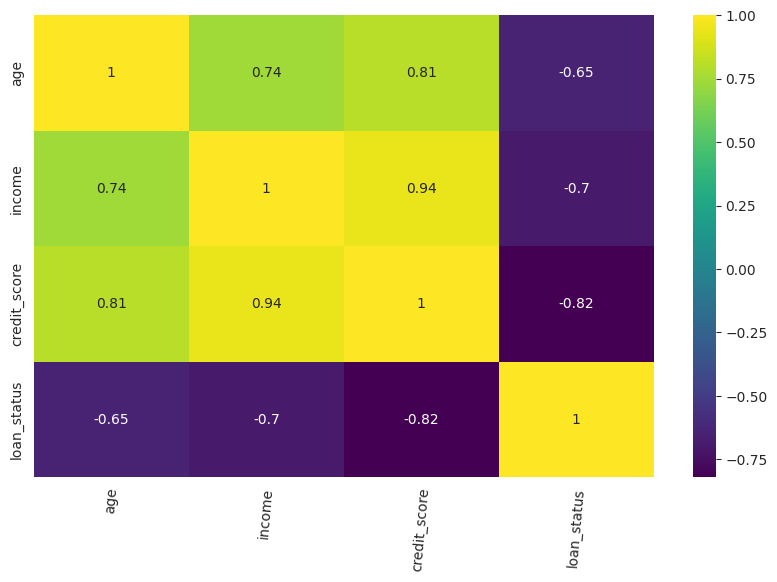

In [17]:
plot_heatmap(numerical_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

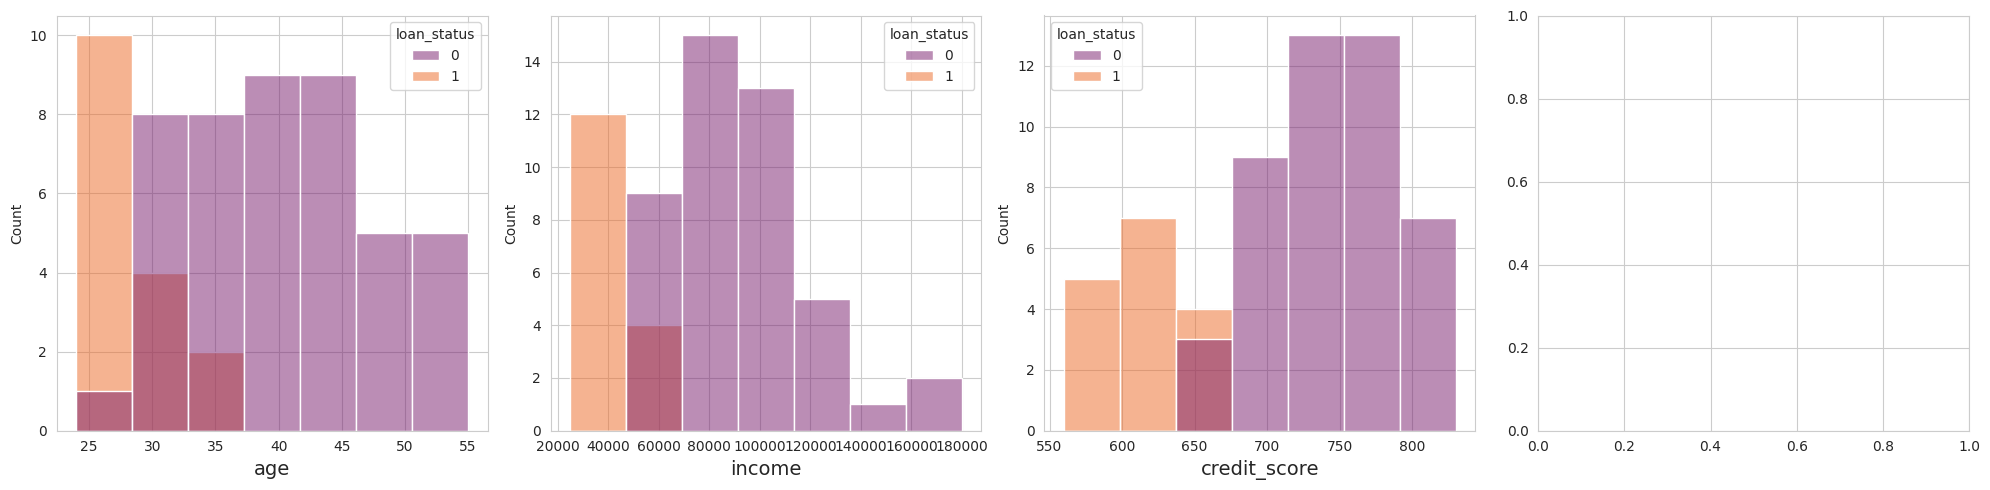

In [18]:
plot_histplot(df, numerical_features,target_feature)

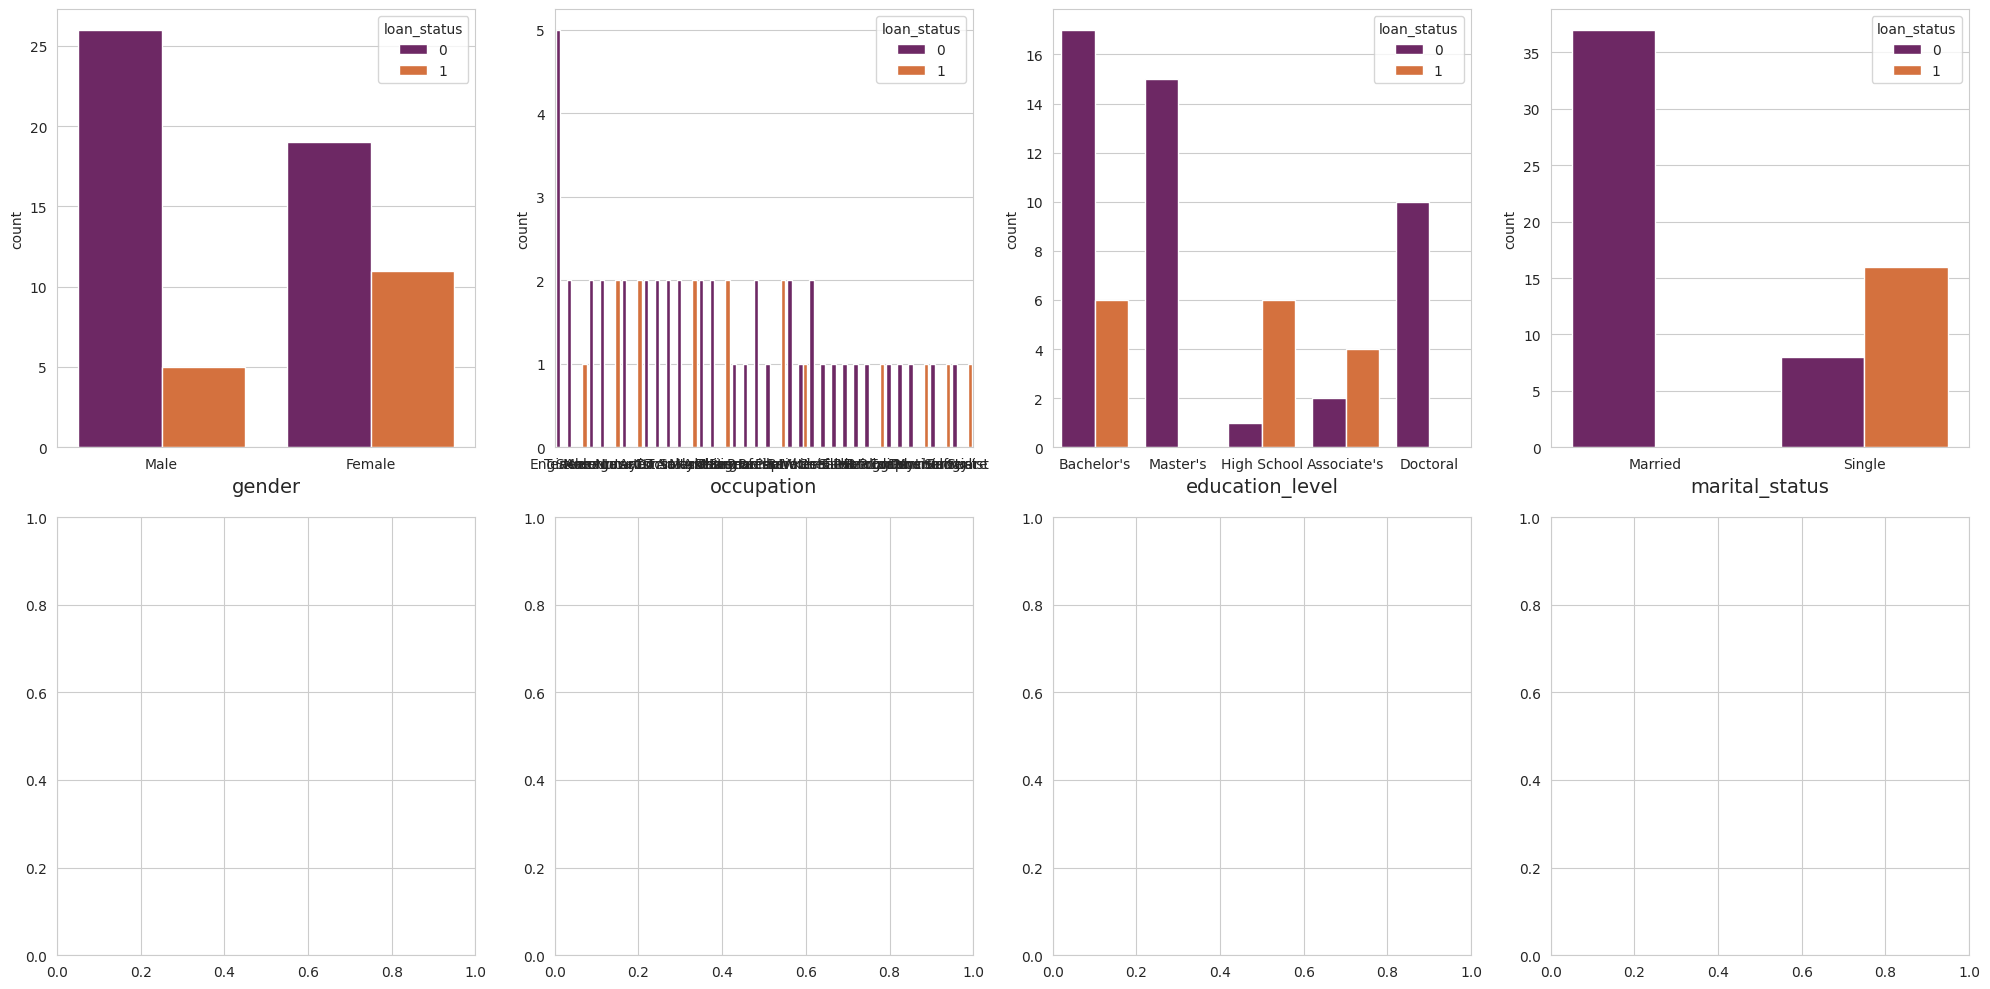

In [19]:
plot_countplot(df, categorical_features,target_feature)

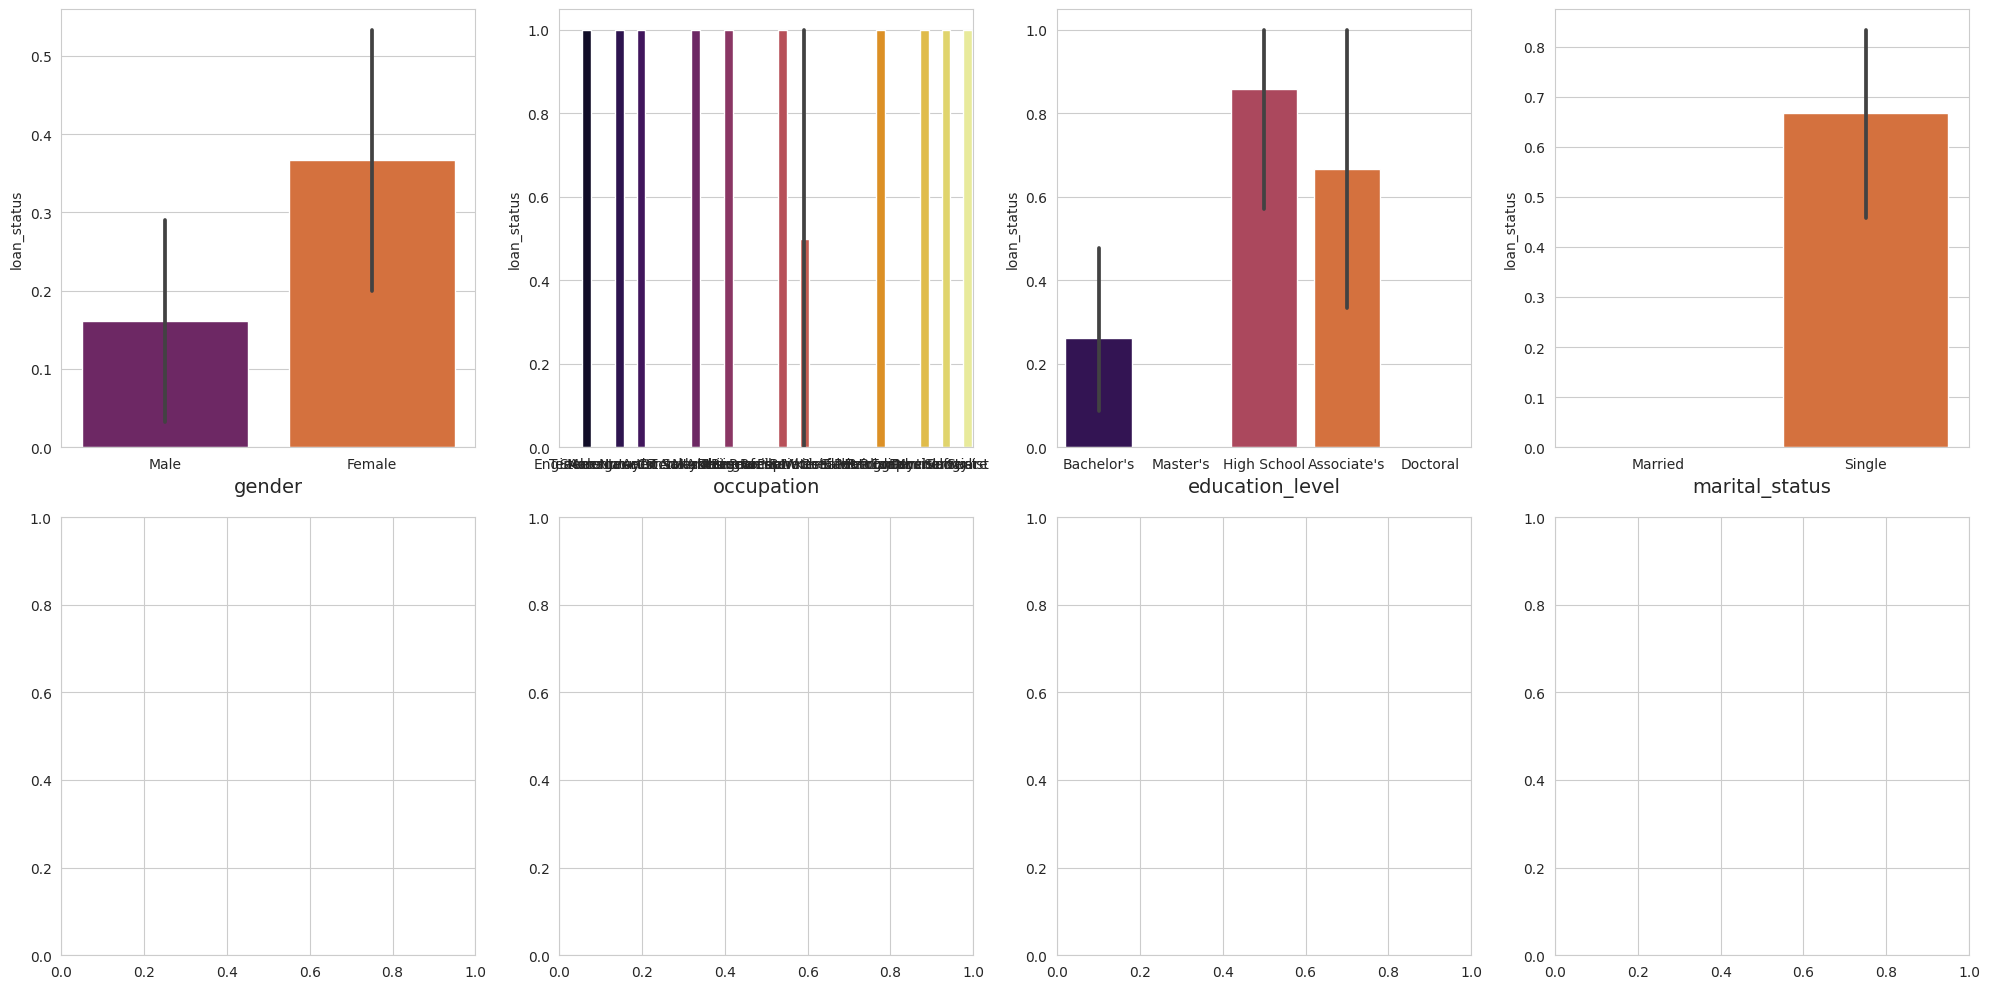

In [20]:
plot_barplot(df, categorical_features,target_feature)

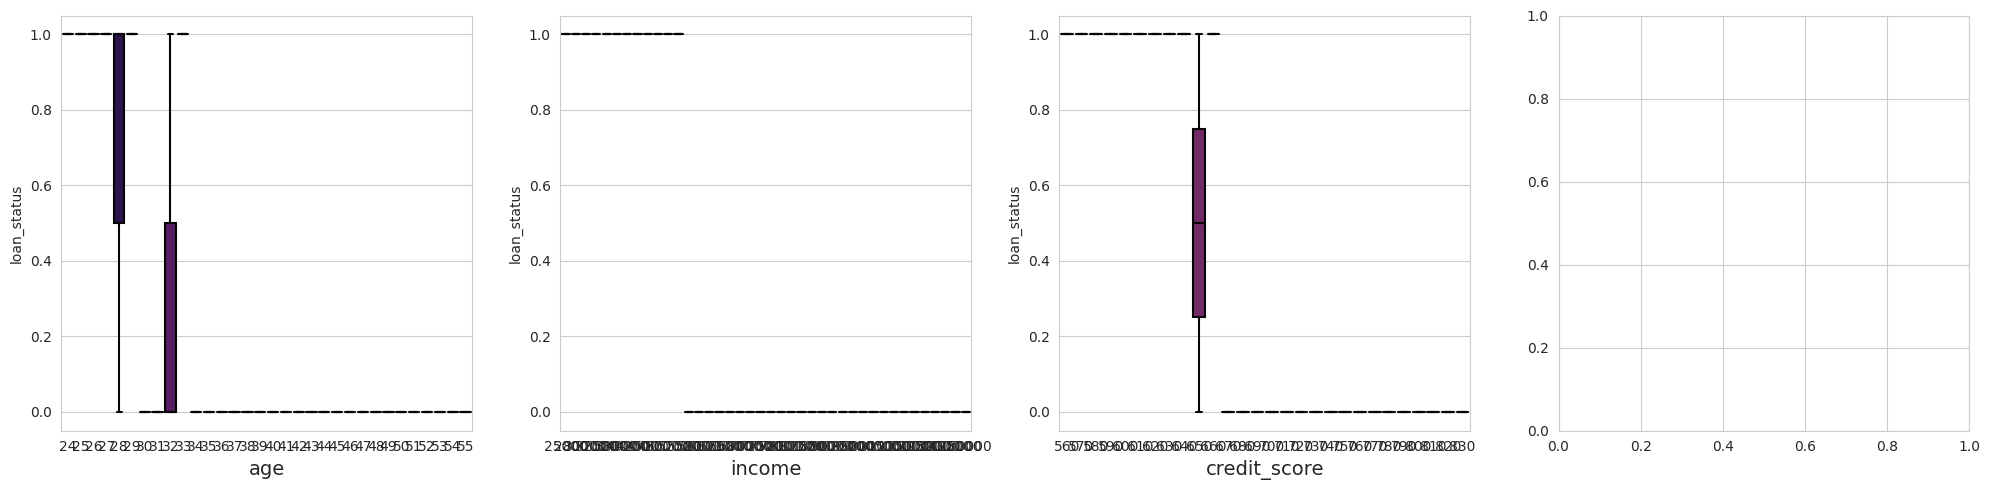

In [21]:
plot_boxplot(df, numerical_features,target_feature)

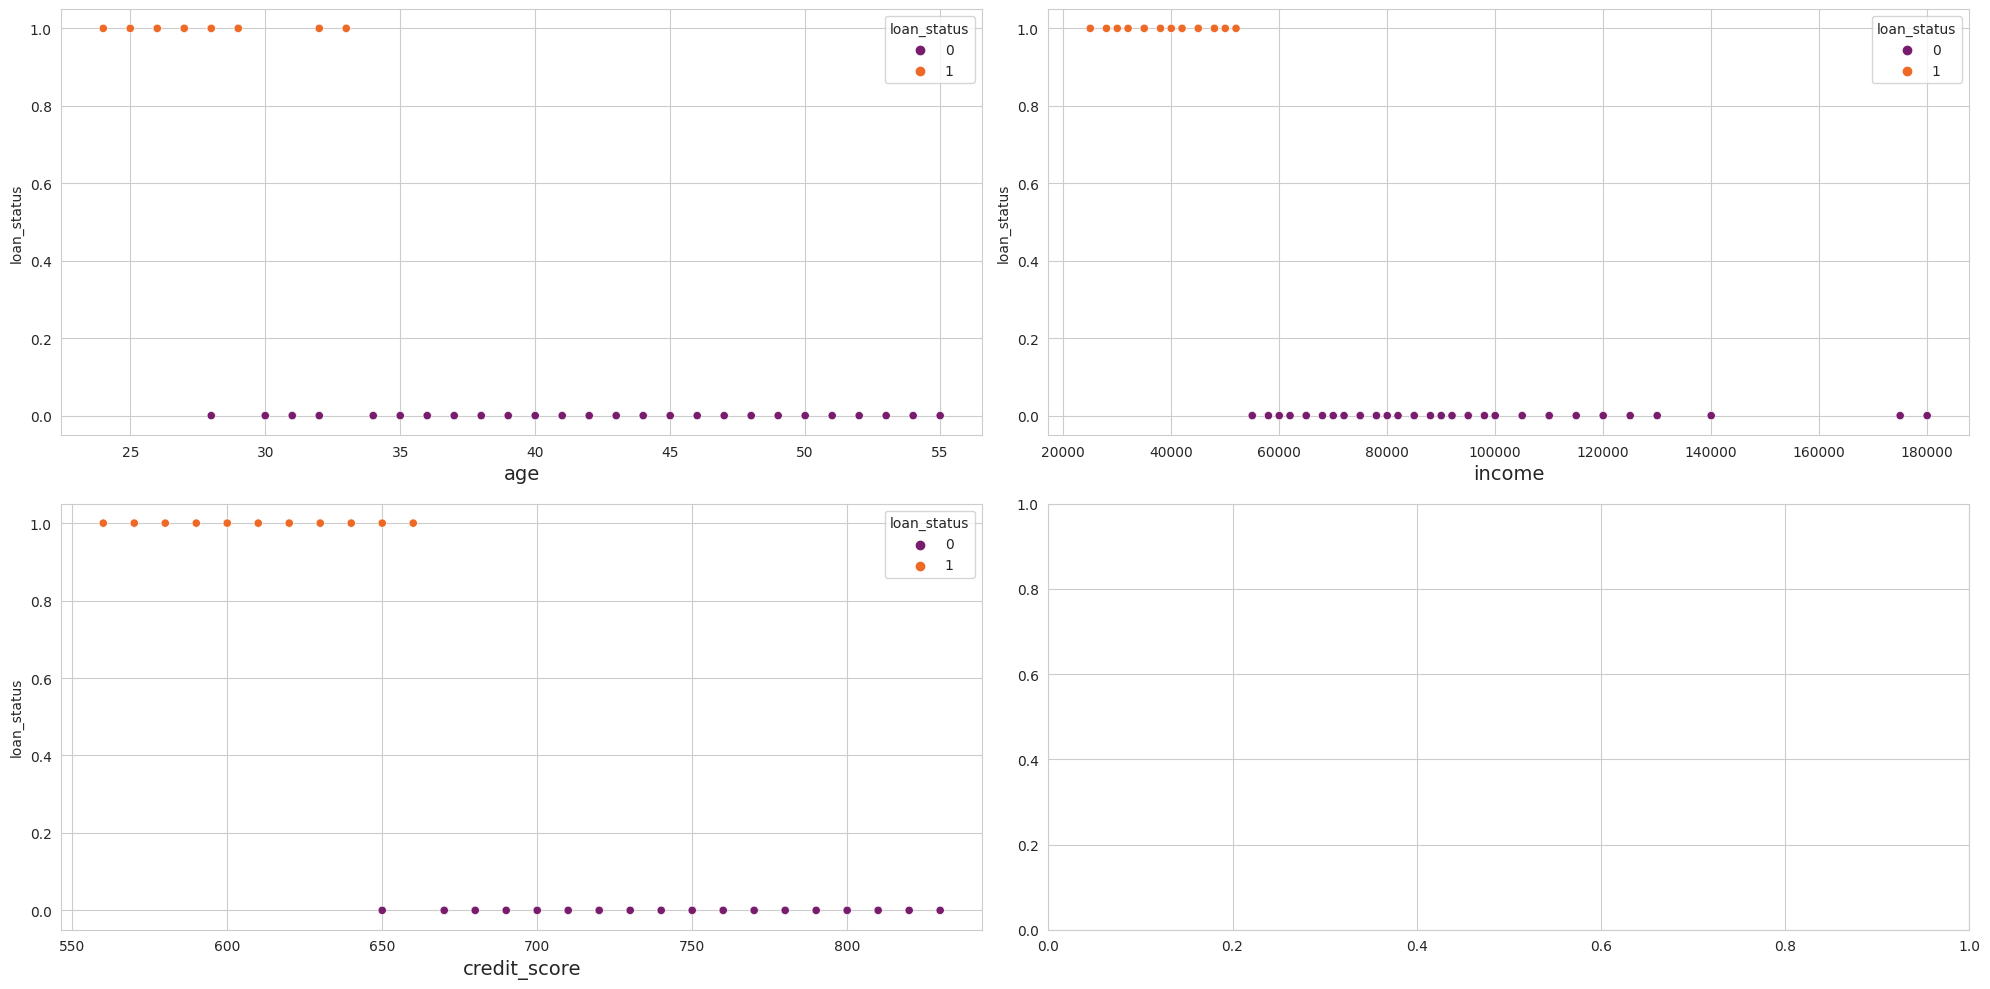

In [22]:
plot_scatterplot(df, numerical_features, target_feature )

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

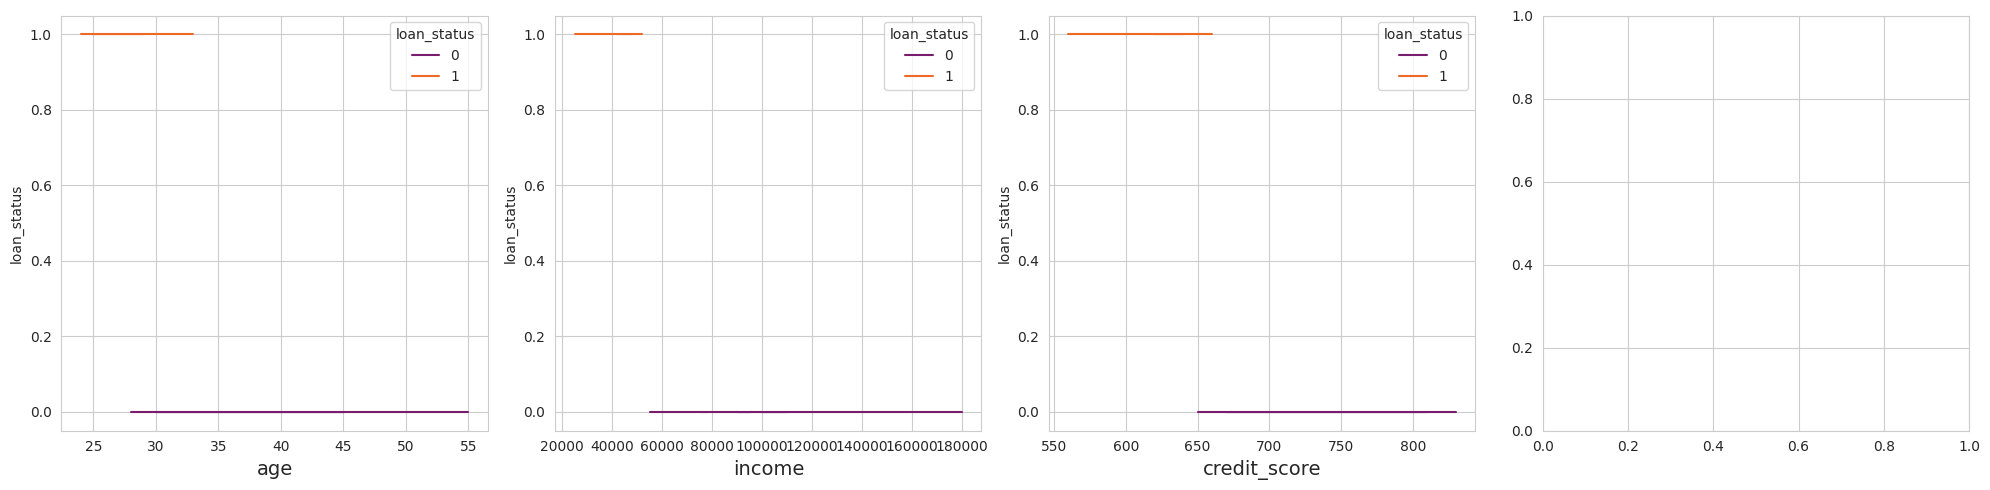

In [23]:
plot_lineplot(df, numerical_features, target_feature)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

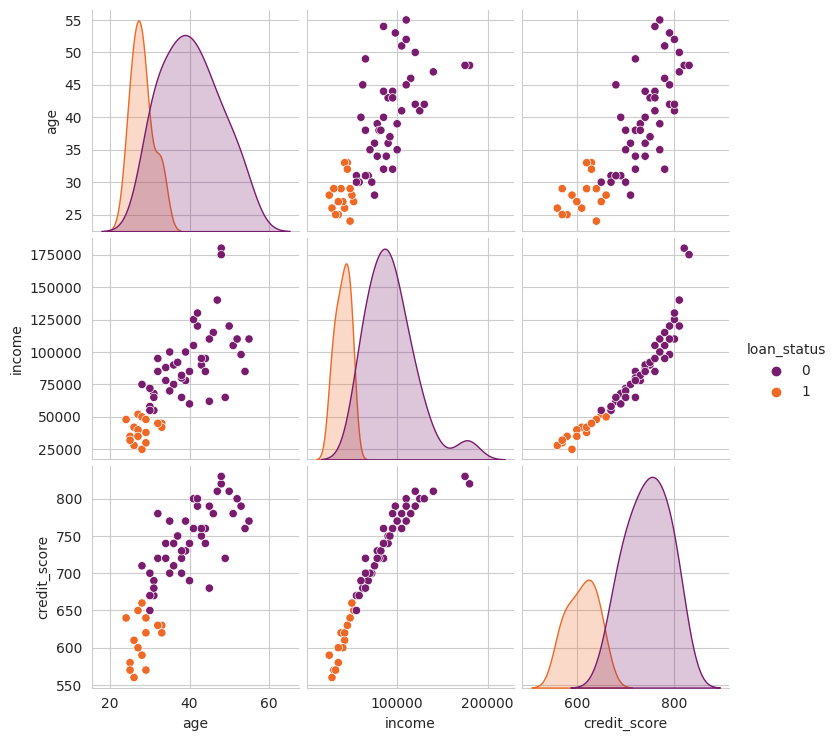

In [24]:
plot_pairplot(df  ,numerical_features,target_feature)

In [25]:
X = df.drop(columns=[target_feature], axis=1)
y = df[target_feature].values

In [26]:
X.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,Male,Engineer,Bachelor's,Married,85000,720
1,45,Female,Teacher,Master's,Single,62000,680
2,28,Male,Student,High School,Single,25000,590
3,51,Female,Manager,Bachelor's,Married,105000,780
4,36,Male,Accountant,Bachelor's,Married,75000,710


In [27]:
y

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [28]:
from sklearn.preprocessing import LabelEncoder 


encoder = LabelEncoder()

for col in categorical_features:
    X[col] = encoder.fit_transform(X[[col]])
    

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    #'Neural Network': MLPClassifier(),
    #'LGBM': LGBMClassifier()
}


params={
    'Logistic Regression': {'C': [0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [200]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13]},
    'Random Forest': {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]},
    'KNN': {'n_neighbors': [3, 5, 7, 9 , 13], 'weights': ['uniform', 'distance']},
    'Naive Bayes': { 'var_smoothing': [1e-9, 1e-8, 1e-7]},
    'Neural Network': {'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)], 
                       'activation': ['logistic', 'tanh', 'relu'],
                       'solver': ['adam'], 'alpha': [0.0001, 0.001, 0.01],
                       'max_iter': [ 500, 1000,2000]},
    'XGBoost': {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]},
    'LGBM': {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}
}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score ,classification_report

# Train function
def train_model(X_train, y_train, models, params):
    best_estimators = {}
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=params[model_name],
            scoring='accuracy',
            cv=5, n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        best_estimators[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best score for {model_name}: {grid_search.best_score_}\n")
    return best_estimators

# Evaluate function
def evaluate_model(X_test, y_test, models):
    classification_reports = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

       

        classification_rep = classification_report(y_test, y_pred)

       

        classification_reports[model_name] = classification_rep

    return  classification_reports

In [33]:
# Train the models
best_models = train_model(X_train, y_train, models, params)


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 100, 'max_iter': 200, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9800000000000001

Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 11}
Best score for Decision Tree: 1.0

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 9, 'n_estimators': 300}
Best score for Random Forest: 1.0

Training Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.8955555555555555

Training XGBoost...
Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 100}
Best score for XGBoost: 0.9777777777777779

Training KNN...
Best parameters for KNN: {'n_neighbors': 13, 'weights': 'uniform'}
Best score for KNN: 0.9377777777777776



In [34]:
# Evaluate the best models
classification_reports = evaluate_model(X_test, y_test, best_models)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating XGBoost...
Evaluating KNN...


In [35]:
# Print classification reports
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:\n{report}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.80      1.00      0.89         4

    accuracy                           0.92       